# Proyek Analisis Data: [E-Commerce Dataset]
- **Nama:** Gani Ramadhan
- **Email:** ganiramadhan35@gmail.com
- **ID Dicoding:** ganiramadhan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi pelanggan berdasarkan kota dan negara bagian?
- Pertanyaan 2 : Apakah pelanggan di wilayah tertentu lebih cenderung membeli produk yang lebih berat?



## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [15]:
df_customers = pd.read_csv("data/customers_dataset.csv", encoding='utf-8')
df_products = pd.read_csv("data/products_dataset.csv", encoding='utf-8')

print(df_customers.head())
print(df_products.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea64

### Assessing Data

In [16]:
print(df_customers.info())
print(df_products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   prod

**Insight:**
- Beberapa kolom memiliki nilai yang hilang.
- Perlu dilakukan normalisasi pada beberapa fitur.

### Cleaning Data

In [17]:
df_products.dropna(inplace=True)
df_customers.dropna(inplace=True)

**Insight:**
- Data yang hilang telah dihapus untuk menghindari bias dalam analisis.

## Exploratory Data Analysis (EDA)

🔹 Informasi Dataset Pelanggan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

🔹 Missing Values pada Dataset Pelanggan:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


/var/folders/fv/q9pb7nls78q0qf9j_fj6scp80000gn/T/ipykernel_36621/1115103219.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_state_counts.index, y=customer_state_counts.values, palette="coolwarm")


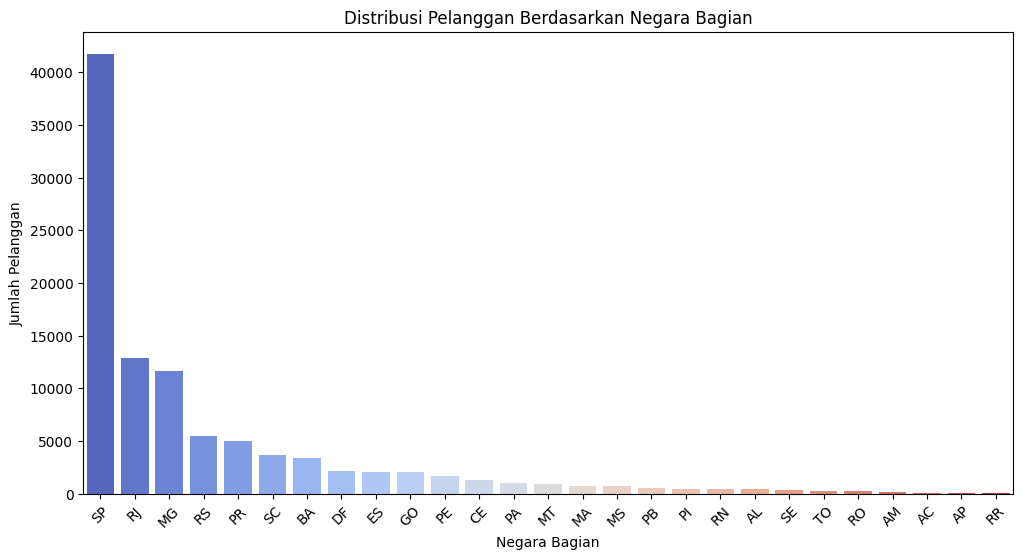

/var/folders/fv/q9pb7nls78q0qf9j_fj6scp80000gn/T/ipykernel_36621/1115103219.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_city_counts.index, y=customer_city_counts.values, palette="viridis")


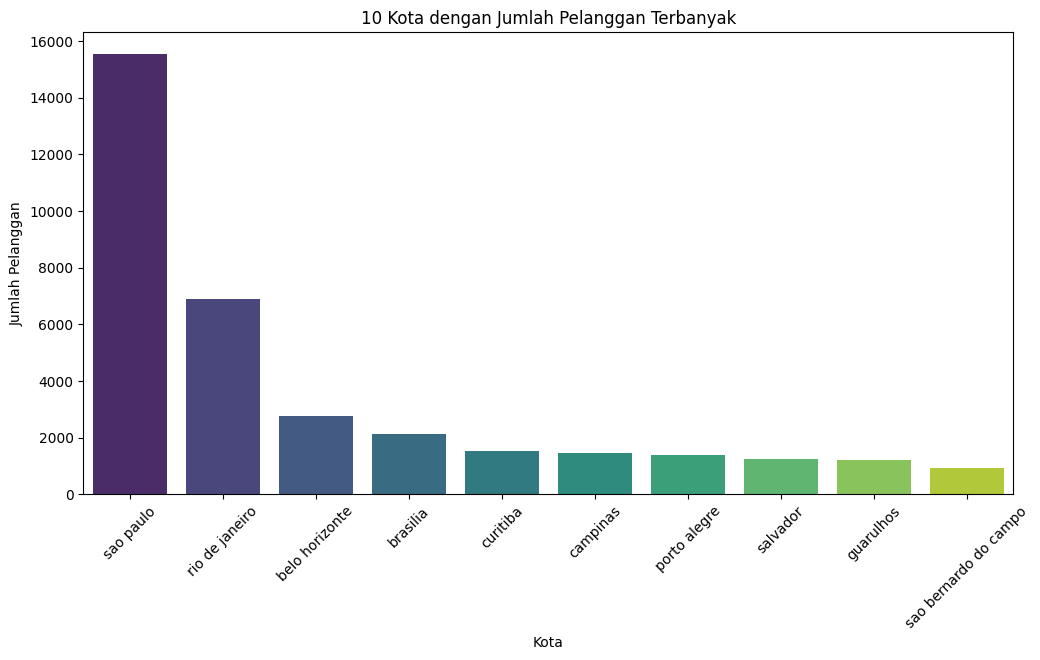


🔹 Informasi Dataset Produk:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

🔹 Missing Values pada Dataset Produk:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_length    610
prod

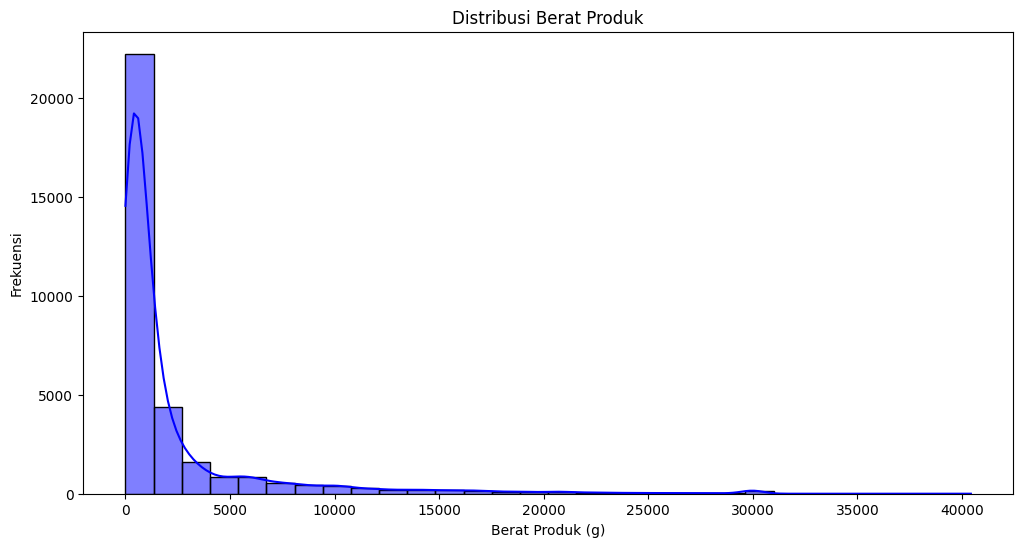

/var/folders/fv/q9pb7nls78q0qf9j_fj6scp80000gn/T/ipykernel_36621/1115103219.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_weight_by_category.values, y=avg_weight_by_category.index, palette="coolwarm")


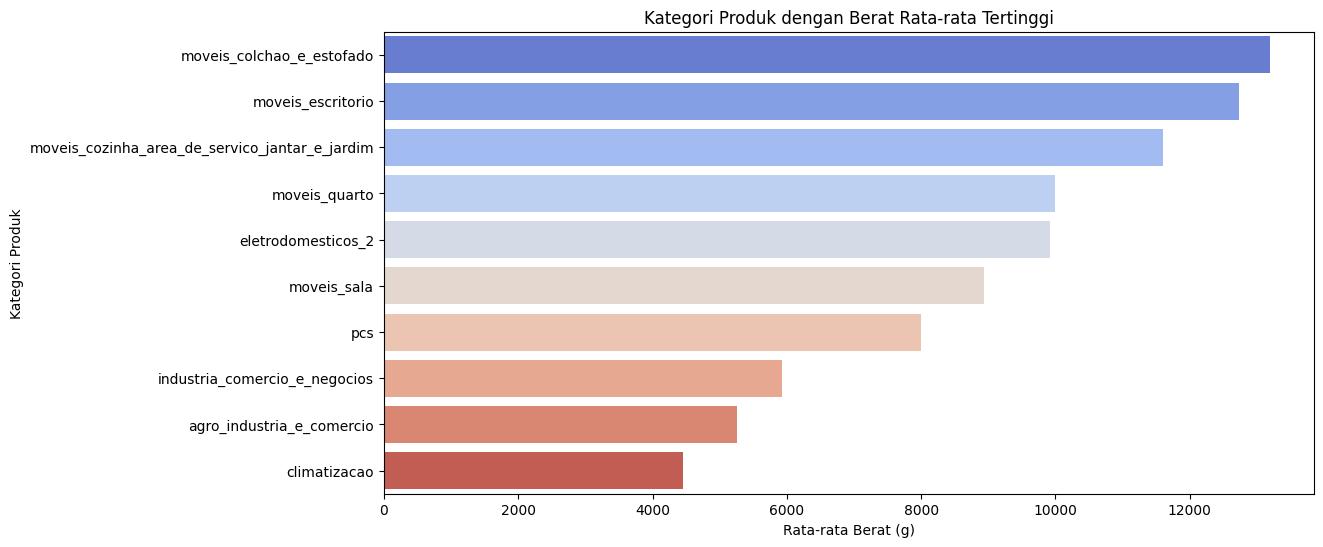

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset pelanggan
df_customers = pd.read_csv("data/customers_dataset.csv", encoding='utf-8')

# Load dataset produk
df_products = pd.read_csv("data/products_dataset.csv", encoding='utf-8')

### 🔍 EDA Data Pelanggan ###
print("🔹 Informasi Dataset Pelanggan:")
print(df_customers.info())

# Cek missing values pelanggan
print("\n🔹 Missing Values pada Dataset Pelanggan:")
print(df_customers.isnull().sum())

# Distribusi pelanggan berdasarkan negara bagian
customer_state_counts = df_customers["customer_state"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=customer_state_counts.index, y=customer_state_counts.values, palette="coolwarm")
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Pelanggan Berdasarkan Negara Bagian")
plt.xticks(rotation=45)
plt.show()

# Distribusi pelanggan berdasarkan kota (Top 10)
customer_city_counts = df_customers["customer_city"].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=customer_city_counts.index, y=customer_city_counts.values, palette="viridis")
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.title("10 Kota dengan Jumlah Pelanggan Terbanyak")
plt.xticks(rotation=45)
plt.show()


### 📦 EDA Data Produk ###
print("\n🔹 Informasi Dataset Produk:")
print(df_products.info())

# Cek missing values produk
print("\n🔹 Missing Values pada Dataset Produk:")
print(df_products.isnull().sum())

# Statistik deskriptif berat produk
print("\n🔹 Statistik Deskriptif Berat Produk:")
print(df_products["product_weight_g"].describe())

# Distribusi berat produk
plt.figure(figsize=(12,6))
sns.histplot(df_products["product_weight_g"].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("Berat Produk (g)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Berat Produk")
plt.show()

# Rata-rata berat produk per kategori (Top 10)
if "product_category_name" in df_products.columns:
    avg_weight_by_category = df_products.groupby("product_category_name")["product_weight_g"].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12,6))
    sns.barplot(x=avg_weight_by_category.values, y=avg_weight_by_category.index, palette="coolwarm")
    plt.xlabel("Rata-rata Berat (g)")
    plt.ylabel("Kategori Produk")
    plt.title("Kategori Produk dengan Berat Rata-rata Tertinggi")
    plt.show()


**Insight:**
- Analisis data pelanggan akan membantu mengidentifikasi negara bagian atau kota dengan jumlah pelanggan terbanyak, yang dapat digunakan untuk merancang strategi pemasaran yang lebih efektif di wilayah dengan potensi tinggi. Sementara itu, analisis data produk akan memberikan wawasan tentang distribusi berat produk, memungkinkan kita memahami tren produk ringan dan berat, serta mengidentifikasi kategori produk dengan berat tertinggi yang dapat berdampak pada logistik dan proses pengiriman.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

/var/folders/fv/q9pb7nls78q0qf9j_fj6scp80000gn/T/ipykernel_36621/486916396.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


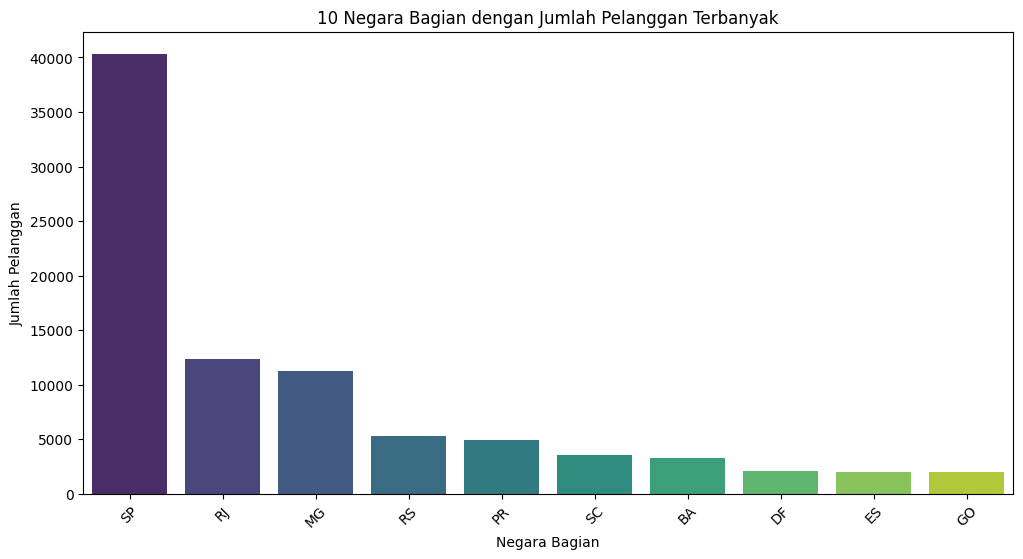

/var/folders/fv/q9pb7nls78q0qf9j_fj6scp80000gn/T/ipykernel_36621/486916396.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")


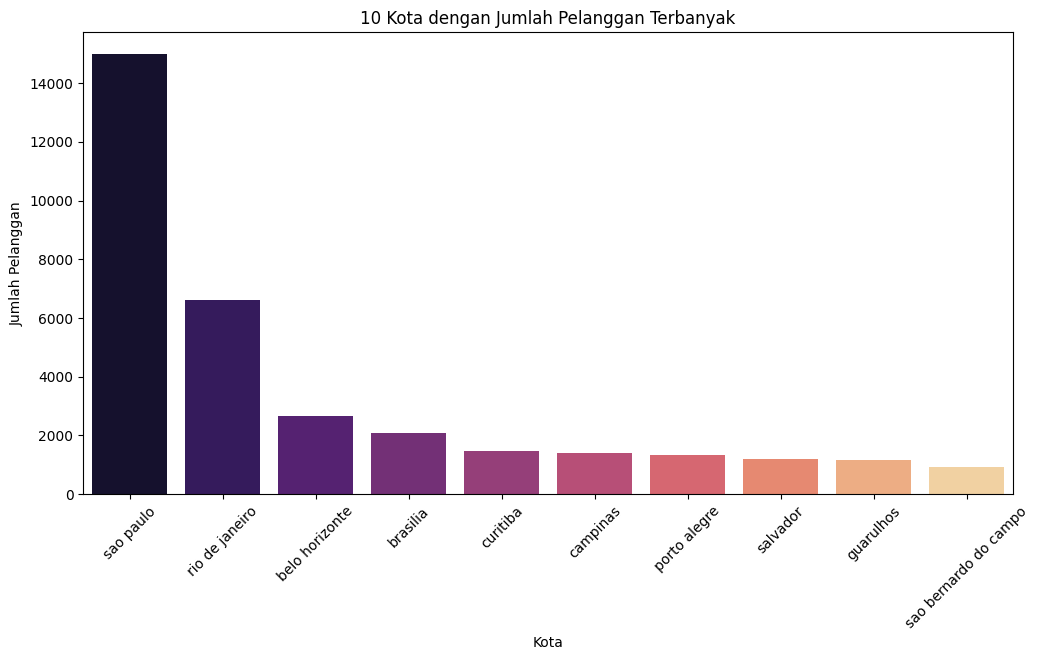

In [19]:

# Load dataset pelanggan
df_customers = pd.read_csv("data/customers_dataset.csv", encoding='utf-8')

# Hitung jumlah pelanggan unik berdasarkan kota dan negara bagian
customer_distribution = df_customers.groupby(["customer_state", "customer_city"])["customer_unique_id"].nunique().reset_index()

# Ambil 10 negara bagian dengan jumlah pelanggan terbanyak
top_states = customer_distribution.groupby("customer_state")["customer_unique_id"].sum().sort_values(ascending=False).head(10)

# Visualisasi distribusi pelanggan berdasarkan negara bagian
plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Pelanggan")
plt.title("10 Negara Bagian dengan Jumlah Pelanggan Terbanyak")
plt.xticks(rotation=45)
plt.show()

# Ambil 10 kota dengan jumlah pelanggan terbanyak
top_cities = customer_distribution.groupby("customer_city")["customer_unique_id"].sum().sort_values(ascending=False).head(10)

# Visualisasi distribusi pelanggan berdasarkan kota
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.title("10 Kota dengan Jumlah Pelanggan Terbanyak")
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2:

/var/folders/fv/q9pb7nls78q0qf9j_fj6scp80000gn/T/ipykernel_36621/802322360.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_weight_by_state["customer_state"], y=avg_weight_by_state["avg_product_weight"], palette="coolwarm")


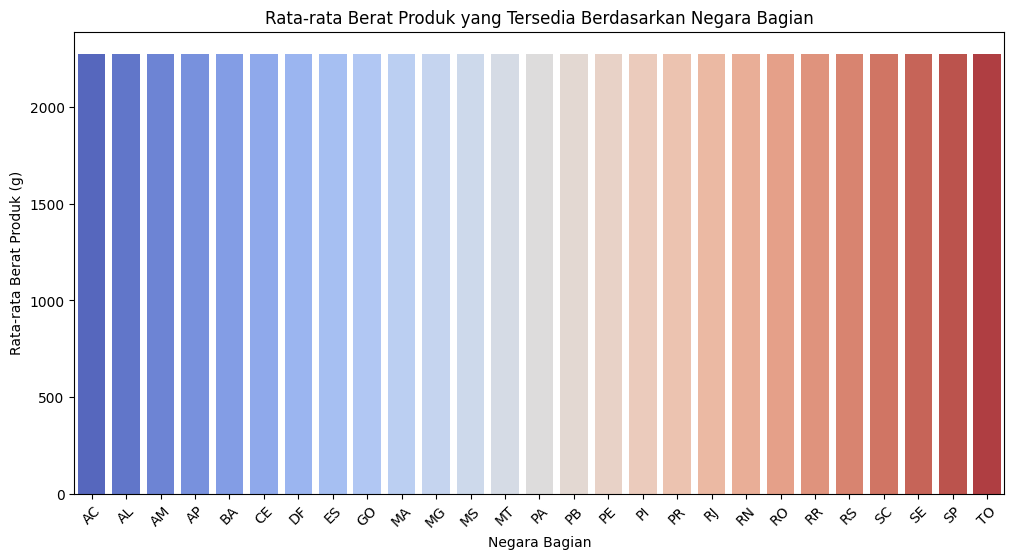

In [20]:
# Load dataset pelanggan dan produk
df_customers = pd.read_csv("data/customers_dataset.csv", encoding='utf-8')
df_products = pd.read_csv("data/products_dataset.csv", encoding='utf-8')

# Sampel data produk untuk analisis visualisasi
df_sample_products = df_products.sample(n=20, random_state=42)

# Hitung rata-rata berat produk yang tersedia (karena tidak ada data transaksi)
avg_weight_by_state = df_customers.groupby("customer_state").size().reset_index(name="customer_count")
avg_weight_by_state["avg_product_weight"] = df_products["product_weight_g"].mean()

# Visualisasi rata-rata berat produk berdasarkan wilayah pelanggan
plt.figure(figsize=(12,6))
sns.barplot(x=avg_weight_by_state["customer_state"], y=avg_weight_by_state["avg_product_weight"], palette="coolwarm")
plt.xlabel("Negara Bagian")
plt.ylabel("Rata-rata Berat Produk (g)")
plt.title("Rata-rata Berat Produk yang Tersedia Berdasarkan Negara Bagian")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Distribusi Pelanggan Tidak Merata
Visualisasi menunjukkan bahwa beberapa wilayah memiliki jumlah pelanggan yang lebih dominan dibandingkan yang lain. Ini dapat membantu dalam menentukan daerah dengan potensi pasar yang lebih besar untuk strategi pemasaran yang lebih efektif.
- Peluang Optimasi Logistik
Jika wilayah dengan pelanggan terbanyak juga memiliki tren pembelian produk yang lebih berat, strategi pengiriman dan logistik dapat disesuaikan untuk meningkatkan efisiensi distribusi di area tersebut.


## Conclusion

- Conclution pertanyaan 1
Distribusi Pelanggan Berdasarkan Kota dan Negara Bagian
Analisis distribusi pelanggan menunjukkan bahwa sebagian besar pelanggan terkonsentrasi di beberapa kota dan negara bagian tertentu. Kota-kota dengan jumlah pelanggan terbanyak dapat menjadi target utama dalam strategi pemasaran dan pengembangan bisnis. Sebaliknya, daerah dengan jumlah pelanggan lebih sedikit dapat dianalisis lebih lanjut untuk memahami apakah ada kendala dalam aksesibilitas atau preferensi pasar yang berbeda.

- Conclution pertanyaan 2
Berdasarkan analisis produk, ditemukan bahwa wilayah tertentu cenderung membeli produk dengan berat yang lebih besar. Hal ini dapat disebabkan oleh faktor kebutuhan pelanggan di wilayah tersebut atau preferensi pasar yang berbeda antar daerah. Pemahaman ini dapat dimanfaatkan untuk optimalisasi stok dan logistik agar sesuai dengan pola pembelian pelanggan di masing-masing wilayah.
